In [1]:
# importing the necessary libraries
import numpy as np
import cv2
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Steps

* Prepare training data
* Face detection
* Training
* Predict

In [9]:
database = {1: "Morin", 2: "Kene", 3: "David", 4: "Samad"}

In [10]:
def face_detection(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haar_classifier = cv2.CascadeClassifier('opencv/data/haarcascades/haarcascade_frontalface_default.xml')
    face = haar_classifier.detectMultiScale(image_gray, scaleFactor=1.3, minNeighbors=7)
    if len(face) == 0:
        return image_gray, []
    (x,y,w,h) = face[0]
    return image_gray[y:y+w, x:x+h], face[0]

In [11]:
def prepare_data(data_path):
    folders = os.listdir(data_path)
    labels = []
    faces = []
    for folder in folders:
        if folder == '.DS_Store':
            continue
        
        label = int(folder)
        training_images_path = data_path + '/' + folder
        for image in os.listdir(training_images_path):
            if image == '.DS_Store':
                continue
                
            image_path = training_images_path + '/' + image
            print(image_path)
            training_image = cv2.imread(image_path)
            #training_image = training_image[...,::-1]
            face, bounding_box = face_detection(training_image)
            print(bounding_box)
            if len(bounding_box) == 0:
                continue
            faces.append(face)
            labels.append(label)        

    print ('Training Done')
    return faces, labels    

In [12]:
faces, labels = prepare_data('training')

training/1/opencv_frame_morin_10.png
[548 181 366 366]
training/1/opencv_frame_morin_28.png
[557 156 348 348]
training/1/opencv_frame_morin_29.png
[538 171 378 378]
training/1/opencv_frame_morin_5.png
[571 189 367 367]
training/1/opencv_frame_morin_4.png
[570 184 375 375]
training/1/opencv_frame_morin_6.png
[554 192 355 355]
training/1/opencv_frame_morin_3.png
[581 186 362 362]
training/1/opencv_frame_morin_2.png
[587 196 359 359]
training/1/opencv_frame_morin_0.png
[590 195 361 361]
training/1/opencv_frame_morin_1.png
[587 197 358 358]
training/1/opencv_frame_morin_49.png
[558 128 397 397]
training/1/opencv_frame_morin_9.png
[545 186 373 373]
training/1/opencv_frame_morin_8.png
[551 192 360 360]
training/1/opencv_frame_morin_27.png
[566 141 354 354]
training/1/opencv_frame_morin_32.png
[542 170 357 357]
training/1/opencv_frame_morin_30.png
[552 169 359 359]
training/1/opencv_frame_morin_18.png
[566 192 358 358]
training/1/opencv_frame_morin_19.png
[551 180 372 372]
training/1/opencv_f

In [13]:
print ('Total faces = ', len(faces))
print ('Total labels = ', len(labels))

Total faces =  80
Total labels =  80


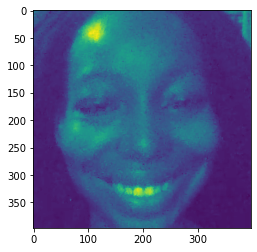

In [29]:
plt.imshow(faces[10])

In [219]:
cv2.imwrite('david.jpg', faces[60])

True

### LBPH Recognizer

In [15]:
f_train = []
f_labels = []
s_train = []
s_labels = []

for i in range(len(faces)):
    if labels[i] == 4:
        s_train.append(faces[i])
        s_labels.append(labels[i])
    else:
        f_train.append(faces[i])
        f_labels.append(labels[i])        

In [16]:
model = cv2.face.LBPHFaceRecognizer_create()
model.train(f_train, np.array(f_labels))

In [17]:
def predict_image(test_image):
    img = test_image.copy()
    face, bounding_box = face_detection(img)
    if len(bounding_box) == 0:
        return [], 0
    label, _ = model.predict(face)
    label_text = database[label]
    (x,y,w,h) = bounding_box
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
    cv2.putText(img, label_text, (x,y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)
    return _, label

In [18]:
from os import listdir

In [23]:
labels

['.DS_Store', '7', '1', '8', '4', '3', '2']

In [24]:
labels = listdir('test')
results = {label: [] for label in labels}

for label in labels:
    if label == '.DS_Store':
        continue
    imgs = listdir('test/'+label)
    
    for img in imgs:
        if img == '.DS_Store':
            continue
            
        test1 = cv2.imread('test/'+label+'/'+img)
        _, predict1 = predict_image(test1)
        if predict1 == 0:
            results[label].append(0)
        else:
            results[label].append((predict1, _))

In [25]:
results

{'.DS_Store': [],
 '7': [(2, 48.899366887687734),
  (2, 86.62035973212224),
  (1, 61.8283252435837),
  (1, 33.57808783447864),
  (1, 39.406381516619604),
  (1, 87.54477832968097),
  (3, 57.85416929560253),
  (2, 54.68392544016791),
  (2, 63.1093082572715),
  (2, 90.95939107183088)],
 '1': [(1, 17.006755634344184),
  (1, 13.375548120899037),
  (1, 13.875880030387059),
  (1, 15.196353178909472),
  (1, 13.614784703044652)],
 '8': [(2, 68.25677928491145),
  (2, 29.093423921459767),
  (2, 63.62396853940088),
  (1, 96.08534392618226),
  (2, 102.90813589877752),
  (2, 45.151526310908864),
  (2, 43.05119618891784),
  (2, 16.58104361142125),
  (2, 89.1057804161503),
  (2, 90.09539690804478)],
 '4': [(2, 21.531650432188812),
  (2, 22.40721350230254),
  (2, 19.792067409949077),
  (2, 21.68235335145047),
  (2, 15.873244091565198)],
 '3': [(3, 19.03851446680972),
  (3, 18.06760748123493),
  (3, 21.605681788263823),
  (3, 18.34308815996445),
  (3, 17.40186233871763)],
 '2': [(2, 11.680965807290958),

In [26]:
model.update(s_train, np.array(s_labels))

In [27]:
labels = listdir('test')
results = {label: [] for label in labels}

for label in labels:
    if label == '.DS_Store':
        continue
    imgs = listdir('test/'+label)
    
    for img in imgs:
        if img == '.DS_Store':
            continue
            
        test1 = cv2.imread('test/'+label+'/'+img)
        _, predict1 = predict_image(test1)
        if predict1 == 0:
            results[label].append(0)
        else:
            results[label].append((predict1, _))

In [28]:
results

{'.DS_Store': [],
 '7': [(4, 47.13160125113383),
  (4, 82.89029451830115),
  (4, 61.77823751256882),
  (1, 33.57808783447864),
  (4, 39.28008214227646),
  (4, 86.23617126442197),
  (3, 57.85416929560253),
  (4, 54.359858561651556),
  (4, 58.0364897305865),
  (4, 85.43499086062657)],
 '1': [(1, 17.006755634344184),
  (1, 13.375548120899037),
  (1, 13.875880030387059),
  (1, 15.196353178909472),
  (1, 13.614784703044652)],
 '8': [(4, 61.667736653576995),
  (2, 29.093423921459767),
  (4, 60.49776349960612),
  (1, 96.08534392618226),
  (4, 98.39584096447638),
  (4, 44.67854535559851),
  (4, 39.38884846658121),
  (2, 16.58104361142125),
  (4, 83.46484233297288),
  (4, 80.65576941755504)],
 '4': [(4, 14.43292019609434),
  (4, 14.683246507238826),
  (4, 13.901199315637822),
  (4, 14.066439728114446),
  (4, 14.52674240450454)],
 '3': [(3, 19.03851446680972),
  (3, 18.06760748123493),
  (4, 21.393284711650857),
  (3, 18.34308815996445),
  (3, 17.40186233871763)],
 '2': [(2, 11.680965807290958),

In [222]:
labels = listdir('training')
results = {label: [] for label in labels if label != '.DS_Store'}

for label in labels:
    if label == '.DS_Store':
        continue
    imgs = listdir('training/'+label)
    
    for img in imgs:
        if img == '.DS_Store':
            continue
        print('training/'+label+'/'+img)    
        test1 = cv2.imread('training/'+label+'/'+img)
        _, predict1 = predict_image(test1)
        if predict1 == 0:
            results[label].append(0)
        else:
            results[label].append(predict1)

training/1/opencv_frame_morin_10.png
0.0
1
Morin
training/1/opencv_frame_morin_28.png
0.0
1
Morin
training/1/opencv_frame_morin_29.png
0.0
1
Morin
training/1/opencv_frame_morin_5.png
0.0
1
Morin
training/1/opencv_frame_morin_4.png
0.0
1
Morin
training/1/opencv_frame_morin_6.png
0.0
1
Morin
training/1/opencv_frame_morin_3.png
0.0
1
Morin
training/1/opencv_frame_morin_2.png
0.0
1
Morin
training/1/opencv_frame_morin_0.png
0.0
1
Morin
training/1/opencv_frame_morin_1.png
0.0
1
Morin
training/1/opencv_frame_morin_49.png
0.0
1
Morin
training/1/opencv_frame_morin_9.png
0.0
1
Morin
training/1/opencv_frame_morin_8.png
0.0
1
Morin
training/1/opencv_frame_morin_27.png
0.0
1
Morin
training/1/opencv_frame_morin_32.png
0.0
1
Morin
training/1/opencv_frame_morin_30.png
0.0
1
Morin
training/1/opencv_frame_morin_18.png
0.0
1
Morin
training/1/opencv_frame_morin_19.png
0.0
1
Morin
training/1/opencv_frame_morin_31.png
0.0
1
Morin
training/1/opencv_frame_morin_36.png
0.0
1
Morin
training/4/opencv_frame_samad

In [228]:
results

{'.DS_Store': [],
 '7': [(4, array([[[113,  94,  97],
           [112,  95,  98],
           [115,  97, 104],
           ...,
           [ 93,  60,  41],
           [ 93,  60,  40],
           [ 94,  61,  41]],
   
          [[113,  94,  97],
           [112,  95,  98],
           [115,  97, 104],
           ...,
           [ 94,  61,  42],
           [ 95,  62,  42],
           [ 96,  63,  43]],
   
          [[113,  94,  97],
           [112,  95,  98],
           [115,  97, 104],
           ...,
           [ 95,  62,  43],
           [ 95,  62,  42],
           [ 96,  63,  43]],
   
          ...,
   
          [[ 75,  60,  44],
           [ 75,  60,  44],
           [ 75,  60,  44],
           ...,
           [ 73,  57,  45],
           [ 65,  49,  37],
           [ 65,  51,  39]],
   
          [[ 74,  59,  43],
           [ 72,  57,  41],
           [ 71,  56,  40],
           ...,
           [ 91,  75,  63],
           [ 72,  56,  44],
           [ 65,  49,  37]],
   
          

In [136]:
c = 0
for i in results.keys():
    c += len(results[i])

In [137]:
c

60

In [145]:
67/73

0.9178082191780822

In [149]:
73-26

47

In [150]:
11+11+25+26

73

In [151]:
73-6

67

In [152]:
60+75

135

In [153]:
73+25

98

In [157]:
47+25

72

In [158]:
11+11+25+20

67

In [159]:
92/98

0.9387755102040817

In [160]:
67+25+6

98

In [161]:
67/(67+6)

0.9178082191780822